In [34]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

species: penguin species (Chinstrap, Adélie, or Gentoo)
culmen_length_mm: culmen length (mm)
culmen_depth_mm: culmen depth (mm)
flipper_length_mm: flipper length (mm)
body_mass_g: body mass (g)
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
sex: penguin sex

What are culmen length & depth?
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

For this penguin data, the culmen length and culmen depth are measured as shown below (thanks Kristen Gorman for clarifying!):

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

In [29]:
df = pd.read_csv('data/penguins_size.csv')

In [15]:
df.shape

(344, 7)

In [17]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Remove the target variable from the training set
The target variable is SalePrice which we remove and assign as an array to its own variable. We will use it later when we do machine learning.

In [30]:
X = df.drop('species', axis=1)
y = df['species']

In [35]:
df.dropna(inplace=True)

In [36]:
df.drop(df.index[df['sex'] == '.'].tolist(),inplace=True)

In [37]:
df.reset_index(inplace=True)

In [38]:
df.drop('index', axis=1, inplace=True)


In [40]:
df.shape

(333, 7)

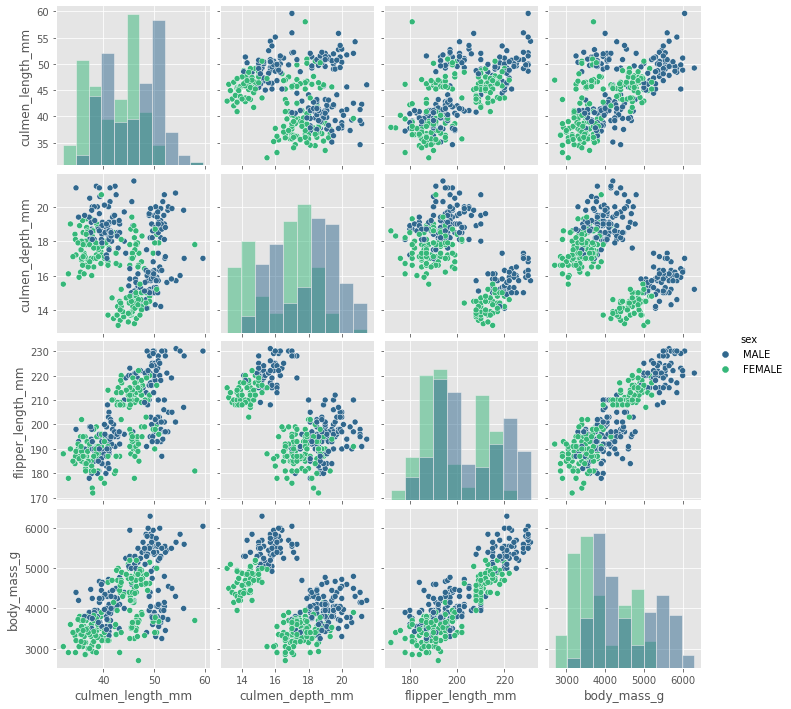

In [41]:
sns.pairplot(data=df, hue='sex', diag_kind='hist', palette='viridis')

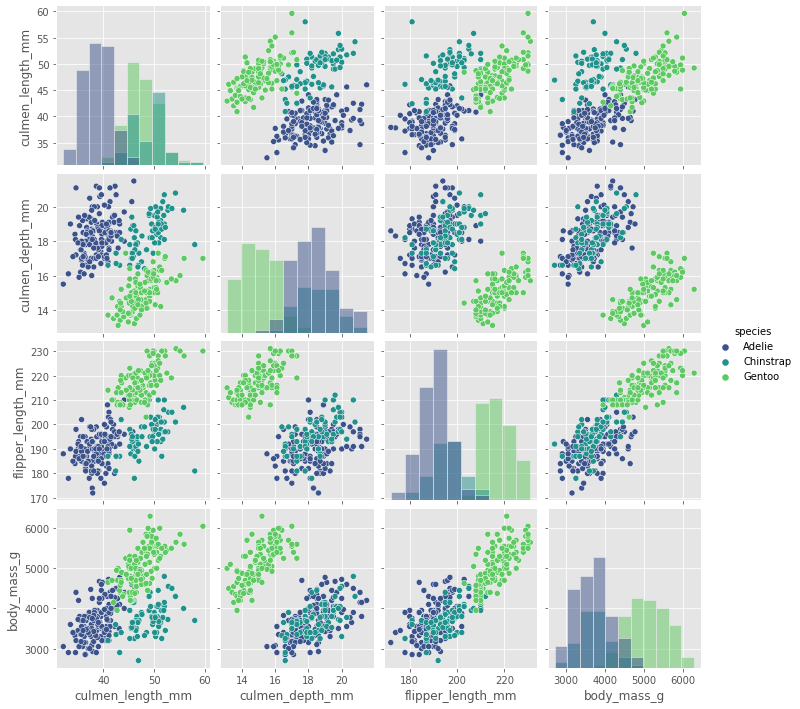

In [42]:
sns.pairplot(data=df, hue='species', diag_kind='hist', palette='viridis')

In [18]:
y = df.pop('species').values

Encoding a single string column
To start off, let’s encode a single string column, 
HouseStyle, which has values for the exterior of the house. 
Let’s output the unique counts of each string value.

In [21]:
vc = df['island'].value_counts()

Scikit-Learn Gotcha — Must have 2D data
Most Scikit-Learn estimators require that data be strictly 2-dimensional. If we select the column above as train['HouseStyle'], technically, a Pandas Series is created which is a single dimension of data. We can force Pandas to create a one-column DataFrame, by passing a single-item list to the brackets like this:

In [25]:
df['island'].ndim

1

In [27]:
hs_train = df[['island']].copy()
hs_train.ndim

2

Import, Instantiate, Fit — The three-step process for each estimator
The Scikit-Learn API is consistent for all estimators and uses a three-step process to fit (train) the data.

Import the estimator we want from the module it’s located in
Instantiate the estimator, possibly changing its defaults
Fit the estimator to the data. Possibly transform the data to its new space if need be.
Below, we import OneHotEncoder, instantiate it and ensure that we get a dense (and not sparse) array returned, and then encode our single column with the fit_transform method.